<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [151]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

house_data=pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [71]:
# A:
#703 - 1900 Danbrook Dr has a negative Price and SQ footage

In [152]:
house_data.drop(703, inplace = True)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [185]:
df = house_data

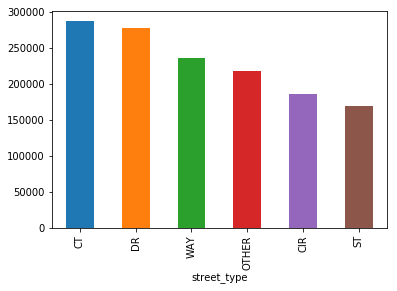

In [74]:
df['street_type'] = df['street'].apply(lambda x: x.split()[-1])

df['street_type'].value_counts()[:5]

df['street_type'] = [type_ if type_ in ['WAY','DR','CT','CIR','ST']
                      else "OTHER" for type_ in df['street_type']]

df.groupby('street_type')['price'].mean().sort_values(ascending=False)[:10].plot(kind='bar')

df = pd.get_dummies(df, columns=['street_type'], drop_first=False).drop(
    'street_type_OTHER', axis=1)


In [75]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type_CIR,street_type_CT,street_type_DR,street_type_ST,street_type_WAY
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,0,0
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0,1,0,0,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0,0,0,0,1
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0,0,0,0,0
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,0,0,0,0,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,0,0,0,1,0


In [76]:
df['longitude'] = abs(df['longitude'])
df.sort_values(by = ['longitude'],ascending = False)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type_CIR,street_type_CT,street_type_DR,street_type_ST,street_type_WAY
310,14 CASA VATONI PL,SACRAMENTO,95834,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,433500,38.650221,121.551704,0,0,0,0,0
445,312 RIVER ISLE WAY,SACRAMENTO,95831,CA,3,2,1375,Residential,Mon May 19 00:00:00 EDT 2008,232000,38.490260,121.550527,0,0,0,0,1
117,4727 SAVOIE WAY,SACRAMENTO,95835,CA,5,3,2800,Residential,Wed May 21 00:00:00 EDT 2008,304037,38.658182,121.549521,0,0,0,0,1
318,241 LANFRANCO CIR,SACRAMENTO,95835,CA,4,4,3397,Residential,Tue May 20 00:00:00 EDT 2008,465000,38.665696,121.549437,1,0,0,0,0
446,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,121.549049,0,0,0,0,1
787,63 ANGEL ISLAND CIR,SACRAMENTO,95831,CA,4,2,2169,Residential,Fri May 16 00:00:00 EDT 2008,311518,38.490408,121.547664,1,0,0,0,0
98,230 CANDELA CIR,SACRAMENTO,95835,CA,3,2,1541,Residential,Wed May 21 00:00:00 EDT 2008,260000,38.656251,121.547572,1,0,0,0,0
144,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,121.545947,0,1,0,0,0
286,15 VANESSA PL,SACRAMENTO,95835,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,312500,38.668692,121.545490,0,0,0,0,0
101,4236 NATOMAS CENTRAL DR,SACRAMENTO,95834,CA,3,2,1672,Condo,Wed May 21 00:00:00 EDT 2008,265000,38.648879,121.544023,0,0,1,0,0


In [77]:
#empty = []
#for each in df['longitude']:
   # distance_longitude = 121.4942 - each
    #distance_longitude = np.array(distance_longitude)
    #pd.DataFrame(distance_longitude, columns = ['a'])
  #  empty.append(distance_longitude)
#np.array(empty)
#df['distance_longitude'] = empty

In [78]:
#empty2 = []
#for each in df['latitude']:
        #distance_latitude = 38.5778 - each 
       # empty2.append(distance_latitude)
#np.array(empty2)
#df['distance_latitude'] = empty2

In [79]:
#empty = []
#for each in df['longitude']:
 #   distance_longitude = 121.4942 - each
    #distance_longitude = np.array(distance_longitude)
    #pd.DataFrame(distance_longitude, columns = ['a'])
  #  empty.append(distance_longitude)
#np.array(empty)
#df['distance_longitude'] = empty

In [80]:
#df.query('distance_longitude > 1')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type_CIR,street_type_CT,street_type_DR,street_type_ST,street_type_WAY,distance_longitude,distance_latitude


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

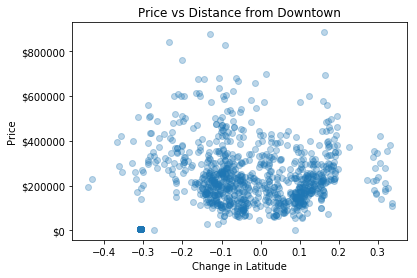

In [82]:
# A:
#plt.plot(df['distance_latitude'],df['price'],'o', alpha = .3)
#plt.xlabel('Change in Latitude')
#plt.ylabel('Price')
#plt.title('Price vs Distance from Downtown')
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%d'))

In [83]:
#np.corrcoef(df.distance_longitude,df.price)

array([[1.        , 0.28447157],
       [0.28447157, 1.        ]])

In [84]:
#plt.plot(df['distance_longitude'],df['price'],'o',alpha = .3)
#plt.xlabel('Change in Longitude')
#plt.ylabel('Price')
#plt.title('Price vs Distance from Downtown')
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%d'))

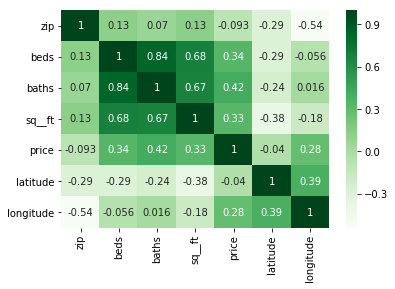

In [156]:
sns.heatmap(house_data.corr(), annot = True, cmap="Greens")

In [86]:
feature_test = ['price','distance_longitude','distance_latitude','longitude','latitude']
temp_df =df[feature_test]

In [155]:
#sns.heatmap(temp_df.corr(), annot = True)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:

I think sq__ft is the best preditor, while baths has a higher correlation the data is unclear.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [145]:
# A:

from sklearn.linear_model import LinearRegression

def coef_intercept(X,y):
    linreg = linear_model.LinearRegression()
    linreg.fit(X,y)
    return print('intercept:',linreg.intercept_,'coef:',linreg.coef_)
    
    



In [220]:
X = df[['sq__ft']].values
y = df['price'].values
coef_intercept(X,y)

intercept: 162938.7375609862 coef: [54.15619752]


### 6. Interpret the intercept. Interpret the slope.

Base price is equal to 162,938
A 1 unit increase in Price corresponds to 54.15 increase in sq_ft



### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [91]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

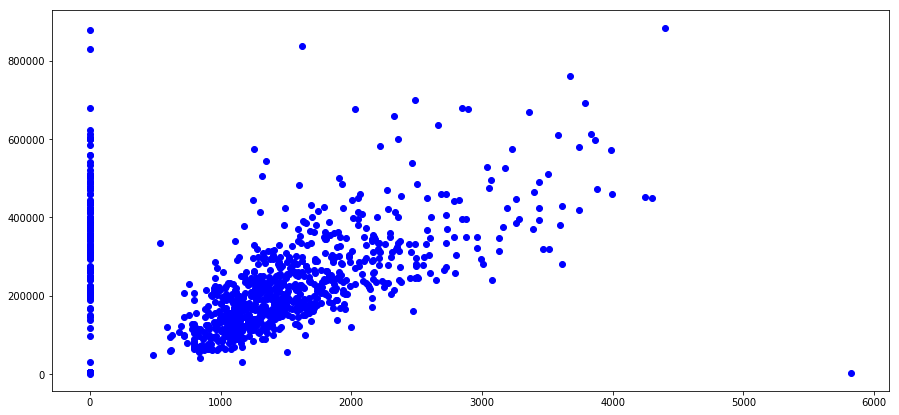

In [118]:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter(df['sq__ft'], target, c='b');

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [421]:
df = pd.get_dummies(df, columns = ['type'])


KeyError: "['type'] not in index"

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [94]:
df.drop(columns = ['type_Unkown'])

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [113]:
# A:

#from sklearn.linear_model import LinearRegression

#model = LinearRegression()

#df_temp = pd.DataFrame(df.loc[:,['longitude','latitude','beds','baths']], columns = ['longitude','latitude','beds','baths'])
#X['intercept'] = 1.
#target = pd.DataFrame(df['price'])

#model = linreg.fit(X, y)

#beta = linreg.coef_
#intercept = linreg.intercept_

#yhat = np.dot(X, beta)


In [410]:
lm = linear_model.LinearRegression()
target = pd.DataFrame(df['price'])
X = df[['sq__ft','longitude','type_Residential']]
y = target 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)
betacoef     =  model.coef_

In [358]:
score

0.2428566334177016

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [304]:
yhat.shape


a=np.column_stack((np.array(y),np.array(yhat)))

In [305]:
a.shape

(984, 2)

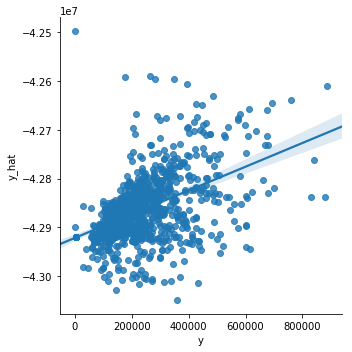

In [312]:
yhat=np.matmul(X,betacoef.T)

new_data=pd.DataFrame(data=a,columns=['y','y_hat'])
sns.lmplot('y','y_hat',data=new_data)

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Linearity
2. Independence of Error
3. Normality
4. Equality of Variances
5. Independence of Predictors



### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

This model does not meet two notable criteria: Normality and Equality of variance. 

Below are a series of histograms that describe the variable distrubtions.  Two of these histograms are heavy skewed right and the last is heavily skewed left.  Thus they are not Normally distributed.

To determine if the Equality of variance I used the Durbin-Watson test for my residuals.  This model calculated out to 3.75 on the DW scale.  This falls far outside the acceptable range of 1.5 to 2.5.  This indicates that the residuals do not follow a consistant pattern and thus do not validate Equality of Variane


    



(array([173., 220., 355., 138.,  55.,  24.,  15.,   3.,   0.,   1.]),
 array([   0. ,  582.2, 1164.4, 1746.6, 2328.8, 2911. , 3493.2, 4075.4,
        4657.6, 5239.8, 5822. ]),
 <a list of 10 Patch objects>)

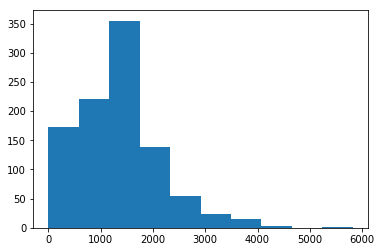

In [462]:
plt.hist(df['sq__ft'])


(array([199., 353., 284.,  69.,  30.,  28.,   4.,  11.,   3.,   3.]),
 array([-121.551704 , -121.4562935, -121.360883 , -121.2654725,
        -121.170062 , -121.0746515, -120.979241 , -120.8838305,
        -120.78842  , -120.6930095, -120.597599 ]),
 <a list of 10 Patch objects>)

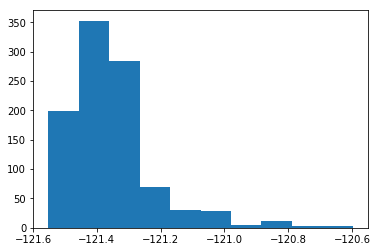

In [444]:
plt.hist(df['longitude'])

(array([ 67.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 917.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

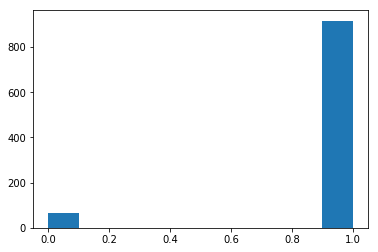

In [446]:
plt.hist(df['type_Residential'])

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
lm = linear_model.LinearRegression()
target = pd.DataFrame(df['price'])
X_table = df[['sq__ft','longitude','type_Residential']]
X_table['intercept'] = 1
y_table = target 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)
betacoef     =  model.coef_

In [478]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

resids=pd.DataFrame(results.resid)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1111.
Date:                Thu, 16 Aug 2018   Prob (F-statistic):          8.21e-315
Time:                        16:50:26   Log-Likelihood:                -12981.
No. Observations:                 984   AIC:                         2.597e+04
Df Residuals:                     981   BIC:                         2.598e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sq__ft              52.5370      4.882  

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [367]:
from sklearn.metrics import r2_score

def r2_adj(X,y, model):
    r2=model.score(X,y)
    Adjusted=1-(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
    return Adjusted
    

In [400]:
r2_adj(X,y,model)

0.24053884760163335

In [401]:
model.score(X,y)

0.2428566334177016

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [398]:
# A:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error

def metrics(y,predicitions):
    r2 = r2_score(y,predictions)
    test =1-(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
    mae = mean_absolute_error(y,predicitions)
    mse = mean_squared_error(y,predicitions)
    rmse = np.sqrt(mse)
    msle = mean_squared_log_error(y,predictions)
    mae = median_absolute_error(y,predicitions)
    

    print('r2: ',r2)
    print('Adjusted r2: ',test) 
    print('Mean Absolute Error: ',mae)
    print('Mean Squared Error: ', mse) 
    print('Root Mean Squared Error: ',rmse)
    print('Means Squared Log Error: ',msle) 
    print('Median Absolute Error', mae)

    


In [409]:
metrics(y,predictions)


r2:  0.24285663341770158
Adjusted r2:  0.24053884760163335
Mean Absolute Error:  68557.61642008275
Mean Squared Error:  14495174993.984486
Root Mean Squared Error:  120395.90937396705
Means Squared Log Error:  0.9173562656564781
Median Absolute Error 68557.61642008275


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [430]:
# A:
#lm = linear_model.LinearRegression()
#target = pd.DataFrame(df['price'])
#X2 = df[['sq__ft','longitude','type_Residential','beds','baths','zip','type_Multi-Family','type_Condo']]
#y2 = target 

#model = lm.fit(X2, y2)

#predictions2  =  model.predict(X2)
#score2       =  model.score(X2, y2)
#betacoef2     =  model.coef_



In [429]:
#metrics(y2,predictions2)

In [427]:
#lm = linear_model.LinearRegression()
#target = pd.DataFrame(df['price'])
#X3 = df[['sq__ft','longitude']]
#y3 = target 

#model = lm.fit(X3, y3)

#predictions3  =  model.predict(X3)
#score3       =  model.score(X3, y3)
#betacoef3     =  model.coef_

In [428]:
#metrics(y3,predictions3)

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [439]:
# A: High bias based on low R2 score.

